In [1]:
# !pip install tesseract
# !pip install tesseract-ocr
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
import numpy as np
from cv2 import *
import time
import os
import threading
import pytesseract
import imutils
import matplotlib.pyplot as plt

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

### Image Preprocessing for shadow and noise removal

In [11]:
img =cv2.imread(r"F:\AI\AI OCR Image processing Project\Image Processing\shadow and background noise removal\ocr\shadow3.jpg")
#print(img)
orig_img= img.copy()

file_name = os.path.basename(r"F:\AI\AI OCR Image processing Project\Image Processing\shadow and background noise removal\ocr\shadow3.jpg").split('.')[0]
file_name = file_name.split()[0]

output_path= os.path.join('output_path', "ocr")
if not os.path.exists(output_path):
    os.makedirs(output_path)

#Rescaling the image
img= cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

#Grayscale conversion
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Shadow removal
rgb_planes =cv2.split(img)
result_planes= []
result_norm_planes= []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    result_planes.append(diff_img)
img = cv2.merge(result_planes)

#Dilation and Erosion for noise removal
kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1) 
img = cv2.erode(img, kernel, iterations=1)  

#img = cv2.GaussianBlur(img, (5, 5), 0)

# Threshold to get image with only b&w (binarization)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

save_path = os.path.join(output_path, file_name + "_filter_" + str('as') + ".png")
cv2.imwrite(save_path, img)
filtered_image=img.copy()

result = pytesseract.image_to_string(img, lang="ben")


### Final Result

In [12]:
t = result.split(sep='\n')
for result in t:
    print(result)

বিজয়া লক্জিতমুখে নীরবে সমস্ত কাহিনী শুনিয়া বৃঝিল, বিলাস এই নূতন নিয়ম নিদারুণ
অভিমানবশেই প্রবর্তিত করিয়াছে। তথাপি এমন কথাও কহিল না যে. এতদিন যাহার সই লইয়।
কাজ করিতেছিল, আজও চলিবে-তাহার নিজের সই জনাবশ্যক। বরঞ্চ বলিল, এগুলো থাক,
কাল সকালে একবার এসে আমার সই নিয়ে যাবেন । বলিয়৷ নায়েবকে বিদায় দিয়া সেইখানেই
স্তব্ধ হইয়া বসিয়! রহিল। বাহিরে দিনের আলো ক্রমশঃ নিবিয়া আসিল, এবং প্রতিবেশীদের ঘরে
ঘরে শীখের শব্দে সন্ধ্যার শান্ত আকাশ চঞ্চল হইয়া উঠিল; তথাপি তাহার উঠিবার লক্ষণ দেখা
গেল না। আরও কতক্ষণ যে সে এমনি একভাবে বসিয়া কাটাইত, বলা যায় না: কিন্তু বেহারা
আলো হাতে করিয়া ঘরে ঢুকিয়াই হঠাৎ অন্ধকারের মধ্যে কত্রীকে একাকী দেখিয়া যেমন
চমকাইয়া উঠিল বিজয়া নিজেও তেমনি লজ্জা পাইয়া উঠিয়া দীড়াইল. এবং বাহিরে আসিয়াই
একেবারে স্তস্তিত হইয়া গেল।

যে জিনিসটি তাহার চোখে পড়িল, সে তাহার সুদূর কল্পনারও অতীত। সে কি কোন কারণে
কোন ছলেও আর এ বাড়িতে পা দিতে পারে ? অথচ সেই প্রায়ানহ্ৃকারেও স্পষ্ট দেখা গেল
সেদিনের সেই সাহেবটিই হ্যাট্‌-সমেত প্রায় সাড়ে-ছয় ফুট দীর্ঘদেহ লইয়া গেটের মধ্যে প্রবেশ
করিয়াছে এবং

After removing shadow and background noise:


Text(0.5, 1.0, 'Filtered')

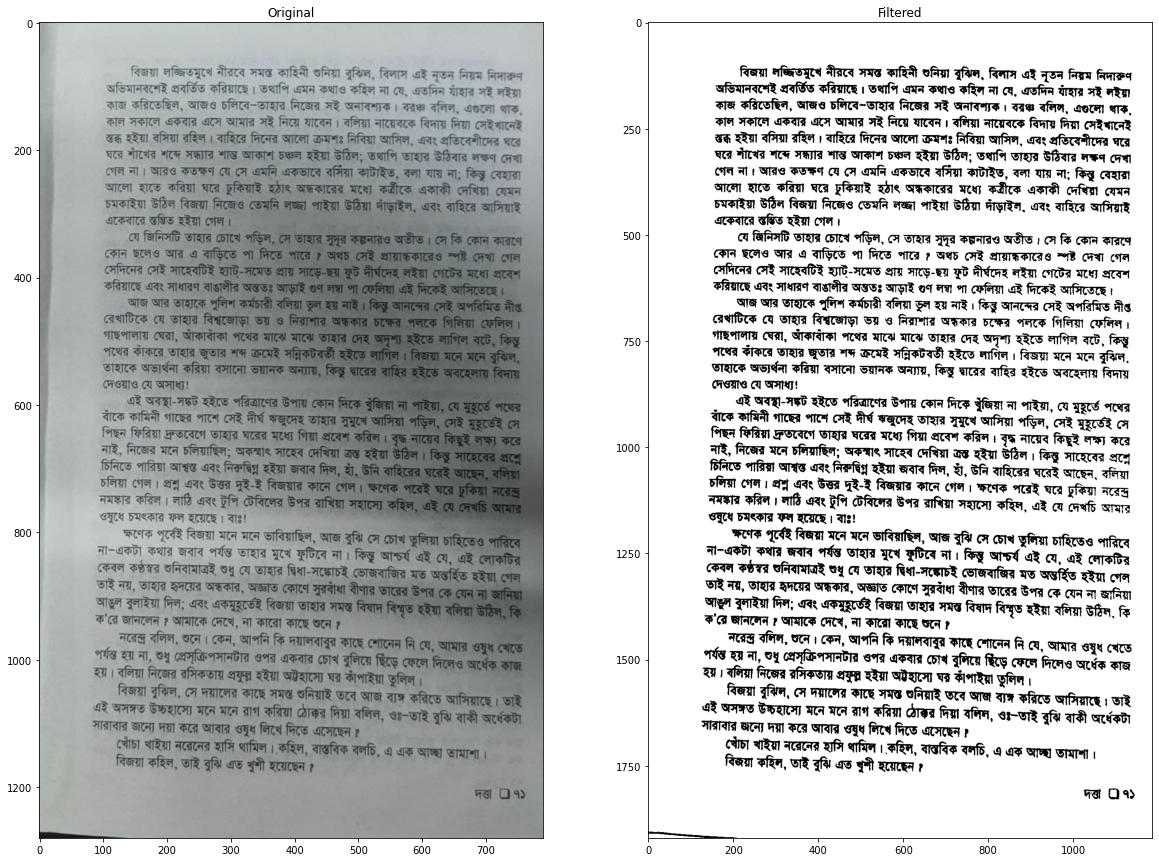

In [13]:
print("After removing shadow and background noise:")

f, ax = plt.subplots( 1, 2, figsize=(20, 15))
ax[0].imshow(orig_img, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(filtered_image, cmap='gray')
ax[1].set_title("Filtered")